# Verificador Entregas Replit
 
1. Descargar .zip de cada entrega asociada al proyecto seleccionado

## Uso

TODO


In [7]:
%reset -sf

In [8]:
evaluacion = "Examen-02"

archivoMain = "main.py"

extensions = ['.py']

In [9]:
import csv

# Key Variables
replitCSV = "my_replit_input_2.csv" # Replit Project Summary CSV file 
replitTeamName = "fund-comp-a2im-med"
usernameCSV = "my_replit_usernames.csv"
myEncoding = 'latin1'
usernameList = [] # 0 = NAME, 1 = USERNAME
removeProjectsEndingInSolution = True 
# if project ends with "Solution" or "Solutions" in the name, don't add to HTML output.

# Funciones

def UsernameInput(usernameList):
    try:
        testCSV = open(usernameCSV, "r",encoding=myEncoding) # Open CSV file to reading
        testCSV.close()
    except:
        print(f"\nFailed to open username CSV file. Ensure it's in the same directory as this script and named {usernameCSV}.\n\nExiting Program...")
        exit()

    # Open file and build list of names/usernames
    with open(usernameCSV,encoding=myEncoding) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        line_count = 0
        for row in csv_reader:
            if line_count == 0:
                # Header row so ignore this for usernames
                line_count += 1
            else:
                usernameList.append(row)
                #print(f'\t{usernameList[line_count-1][0]} has a username of {usernameList[line_count-1][1]}')

                #print(f'\t{row[0]} has a username of {row[1]}')
                
                line_count += 1
        print(f'Processed {line_count - 1} students.\n')

    return usernameList



def ProjectNames(projectNames, row):
    # row has all project names, but we only want the ones that end in " Status"
    for eachHeader in row:
        stringLength = len(eachHeader)
        writeAdjustString = False # Used to decide if adding project to html list or not
        
        if eachHeader[stringLength - 7 :] == " Status":
            # Replace terms in project name with web friendly (used by Replit) characters
            adjustedString = eachHeader[0 : -7].replace("&", "and") 
            adjustedString = adjustedString.replace("<", "less")
            adjustedString = adjustedString.replace(">", "greater")
            adjustedString = adjustedString.replace("'", "")
            adjustedString = adjustedString.replace("/", "")
            adjustedString = adjustedString.replace(" ", "-")
            

            if removeProjectsEndingInSolution == True:
                stringLength = len(adjustedString)
                if adjustedString[stringLength - 9 :] == "Solutions":
                    pass
                elif adjustedString[stringLength - 8 :] == "Solution":
                    pass
                else:
                    writeAdjustString = True
            
            if writeAdjustString == True:
                projectNames.append(adjustedString)
            
            writeAdjustString = False

    return projectNames



def OpenReplitCSVFile(usernameList):
    try:
        testCSV = open(replitCSV, "r",encoding=myEncoding) # Open CSV file to reading
        testCSV.close()
    except:
        print(f"\nFailed to open CSV file. Ensure it's in the same directory as this script and named {replitCSV}.\n\nExiting Program...")
        exit()

    projectNames = [] # Contains only the Replit project names in a list

    # Open Replit Project Summary CSV and pull data
    with open(replitCSV,encoding=myEncoding) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        line_count = 0
        for row in csv_reader:
            if line_count == 0:
                projectNames = ProjectNames(projectNames, row)
                
                line_count += 1
            else:
                #print(f'\t{row[0]} works in the {row[1]} department, and was born in {row[2]}.')
                line_count += 1 # just increment here. Nothing else to do
    
    return projectNames

## Prueba de funciones

In [10]:
usernameList = []
print("\nImporting from username CSV file...")
usernameList = UsernameInput(usernameList)
print(usernameList)

print("Importing from replit CSV file...")
projectNames = OpenReplitCSVFile(usernameList)
print(f"Project names are:\n{projectNames}\n")


# project = projectNames[projectNames.index(evaluacion)]
# print(project)
ziplinks = []

for eachStudentZipLink in usernameList:
    ziplinks.append("https://replit.com/@" + replitTeamName + "/" + evaluacion + "-" + eachStudentZipLink[1] + ".zip")
    print(ziplinks[-1])
# print(ziplinks)


Importing from username CSV file...
Processed 18 students.

[['Maria Alejandra Alejandra', 'Maria-Alejan173'], ['Paola Garces', 'PaolaGarces'], ['María Clara Gaviria', 'mariaclaragaviria'], ['Santiago Hoyos', 'SantiagoHoyos6'], ['Federico Juris', 'FedericoJuris'], ['labdinamica', 'labdinamica'], ['Esteban Mora', 'estebanmora5'], ['natalianeira', 'natalianeira'], ['Juan Ossa', 'JuanOssa3'], ['Tomas Ramírez', 'TomasRamirez10'], ['Juan Rivera', 'JuanRivera44'], ['Leandra S', 'LeandraS'], ['saidtellez', 'saidtellez'], ['SaraUribeU', 'SaraUribeU'], ['Vanessa Taborda', 'vanessataborda'], ['valenbetancur4', 'valenbetancur4'], ['Valeria Vallejo', 'valeriavallejo'], ['vprvrjd8jq', 'vprvrjd8jq']]
Importing from replit CSV file...
Project names are:
['Practiquemos-Listas', 'Taller-Listas', 'Examen-02', 'Practiquemos-Archivos', 'Taller-de-Archivos', 'Practiquemos-Ciclos-y-Strings', 'Practiquemos-Ciclos-y-Strings-2', 'Ciclos-y-Strings-1', 'Ciclos-y-Strings-2', 'PracticaExamen01', 'Examen01', 'Exam

Ahora descargamos los .zip con Simple Mass Downloader, o cualquier otro gestor de descargas masivas:

https://chrome.google.com/webstore/detail/simple-mass-downloader/abdkkegmcbiomijcbdaodaflgehfffed

In [11]:
# wget no funciona porque se requiere tener la sesión activa, habrá que explorarlo mejor.
# import wget

# wgetb.download(ziplinks[0],usernameList[0][0] + '.zip')

## Extracción de los archivos desde los .zip

1. se requiere indicar los archivos solicitados, usualmente estaría main.py.
2. indicar la carpeta donde están los .zip
3. Ciclo para iterar por cada archivo .zip
    1. crear una carpeta con el nombre del .zip
    2. extraer los archivos solicitados en dicha carpeta
    3. agregar enlace de archivo main.py a lista

In [11]:
import os
from pathlib import Path

import tkinter as tk
from  tkinter import filedialog

root = tk.Tk()
root.withdraw()

''

## Procesar carpeta con archivos comprimidos o con carpetas descomprimidas

Requiere: 
- una carpeta con los .zip generados por Aula Digital
    - Con esta opción, descomprime los .zip y genera carpetas con consecutivos
o
- una carpeta con las subcarpetas de las evaluaciones.
    - Con esta opción, solo identifica las subcarpetas
    
El resultado es la lista ```basepaths```

In [12]:
rootpath = Path(filedialog.askdirectory())
# rootpath = Path(r"C:\Users\000092114\UPB\Fundamentos de Computacion 2022-20 - Profesores - Profesores\_notas\seg1\Test")
basepaths = []
content = rootpath.glob('*/')
contList = [Path(x) for x in content]
folders = [x for x in contList if x.is_dir()]
files = [x for x in contList if x.is_file() and x.suffix == ".zip"]
# print(folders)
# print(files)
generateNB = False
if folders == [] and files != []: # si no se ha descomprimido nada y hay .zips por descomprimir
    from zipfile import ZipFile
#     grupo = 1
    # ahora se define el nombre de la carpeta con un consecutivo.
    for file in files:
        # Create a ZipFile Object and load each file
        folderName = file.name.split('.')[0]
        with ZipFile(str(file), 'r') as zipObj:
           # Extract all the contents of zip file in different directory
            zipObj.extract(archivoMain,path=file.parent/folderName)
            generateNB = True
        basepaths.append(file.parent/folderName)
#         grupo += 1
elif folders != []:
    basepaths = folders
    generateNB = True
    
print(basepaths)

[WindowsPath('C:/Users/LMAG/Downloads/examen02/Examen-02-JuanOssa3'), WindowsPath('C:/Users/LMAG/Downloads/examen02/Examen-02-JuanRivera44'), WindowsPath('C:/Users/LMAG/Downloads/examen02/Examen-02-LeandraS'), WindowsPath('C:/Users/LMAG/Downloads/examen02/Examen-02-Maria-Alejan173'), WindowsPath('C:/Users/LMAG/Downloads/examen02/Examen-02-mariaclaragaviria'), WindowsPath('C:/Users/LMAG/Downloads/examen02/Examen-02-saidtellez'), WindowsPath('C:/Users/LMAG/Downloads/examen02/Examen-02-SantiagoHoyos6'), WindowsPath('C:/Users/LMAG/Downloads/examen02/Examen-02-SaraUribeU'), WindowsPath('C:/Users/LMAG/Downloads/examen02/Examen-02-TomasRamirez10'), WindowsPath('C:/Users/LMAG/Downloads/examen02/Examen-02-valenbetancur4'), WindowsPath('C:/Users/LMAG/Downloads/examen02/Examen-02-valeriavallejo'), WindowsPath('C:/Users/LMAG/Downloads/examen02/Examen-02-vanessataborda')]


## Procesar los archivos

In [19]:
nameList,scriptList = list(),list()
pathList = basepaths
for basepath in basepaths:
#     for entry in os.listdir(basepath):
    #agregue el nombre a la lista de nombres (extraido del nombre de la entrega)
    nameList.append(basepath.name.split("-")[-1])
    #recoja todos los archivos de cada entrega
    p = basepath.glob("**/*")
    #solo guarde los que estén en la lista de extensiones (para evitar que coja los cuadernos)
    scriptList.append([x for x in p if x.is_file() and x.suffix in extensions])
    


In [20]:
for pat,nam,scr in zip(pathList,nameList,scriptList):
    print("\n",nam)
    print(pat)
    print(scr)
    if scr == []:
        print(f"\n\nError de archivos con {nam}, no se encontraron archivos para revisar en {pat}\n\n")
    # leer el contenido del archivo como texto
    #print(scriptList[-1][-1].read_text())


 JuanOssa3
C:\Users\LMAG\Downloads\examen02\Examen-02-JuanOssa3
[WindowsPath('C:/Users/LMAG/Downloads/examen02/Examen-02-JuanOssa3/main.py')]

 JuanRivera44
C:\Users\LMAG\Downloads\examen02\Examen-02-JuanRivera44
[WindowsPath('C:/Users/LMAG/Downloads/examen02/Examen-02-JuanRivera44/main.py')]

 LeandraS
C:\Users\LMAG\Downloads\examen02\Examen-02-LeandraS
[WindowsPath('C:/Users/LMAG/Downloads/examen02/Examen-02-LeandraS/main.py')]

 Alejan173
C:\Users\LMAG\Downloads\examen02\Examen-02-Maria-Alejan173
[WindowsPath('C:/Users/LMAG/Downloads/examen02/Examen-02-Maria-Alejan173/main.py')]

 mariaclaragaviria
C:\Users\LMAG\Downloads\examen02\Examen-02-mariaclaragaviria
[WindowsPath('C:/Users/LMAG/Downloads/examen02/Examen-02-mariaclaragaviria/main.py')]

 saidtellez
C:\Users\LMAG\Downloads\examen02\Examen-02-saidtellez
[WindowsPath('C:/Users/LMAG/Downloads/examen02/Examen-02-saidtellez/main.py')]

 SantiagoHoyos6
C:\Users\LMAG\Downloads\examen02\Examen-02-SantiagoHoyos6
[WindowsPath('C:/Users

## Creación de cuadernos individuales por estudiante con el reporte

### Importar módulos y definición de funciones

**Atención**: solo correr si se requiere generar los cuadernos de retroalimentación.

In [38]:
if generateNB:

    import nbformat as nbf
    import itertools 

    def conformarCeldas(cuaderno,nombre,scripts):
        cellsList = list()
        text = f"""\
# {nombre}
# {evaluacion}
"""
        cellsList.append(nbf.v4.new_markdown_cell(text))
        code = f"""\
%%javascript
IPython.notebook.events.off('checkpoint_created.Notebook');
IPython.notebook.events.off('notebook_saved.Notebook');
"""
        cellsList.append(nbf.v4.new_code_cell(code))

        for script in scripts:
            try:
                codeText = script.read_text(encoding="utf8")
            except:
                print(f"fallo lectura de codigo en {script}")
                return cellsList
            code = f"""\
# {script.stem}\n
%reset -sf\n#para correr el script desde cero, esta linea no afectara la ejecución de su codigo.\n
{codeText}"""
            cellsList.append(nbf.v4.new_code_cell(code))
        return cellsList

### Crear cuadernos con script por celda de código

Se pone el nombre del estudiante en una celda de markdown
Luego se crea una celda de código por programa, con un comentario con el nombre del archivo.

In [15]:
if generateNB:

    for (estPath,estName,estScripts) in zip(pathList,nameList,scriptList):

        nb = nbf.v4.new_notebook()

        celdas = conformarCeldas(nb,estName,estScripts)

        nb['cells'] = celdas
        nbf.write(nb, estPath/f'{estName}.ipynb')

NameError: name 'nbf' is not defined

### Verificar similaridad

Correr estas celdas individualmente.
1. Conformar la lista de scripts y estudiantes consolidada
2. correr la celda para generar el mapa de similaridad

In [21]:
# generar mapa de similaridad
from difflib import SequenceMatcher
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statistics
import re


def stripComments(code):
    code = str(code)
    return re.sub(r'(?m)^ *#.*\n?', '', code)
def stripLines(code,lines):
    return ''.join(code.splitlines())[lines:]

In [22]:
try:
    print(umbral,'%')
    print(similarStdev,'%')
except:
    umbral = 90 #porcentaje de similitud

dimension = len(scriptList)
similarity = np.zeros((dimension,dimension))
mostSimilar = []
flatSimilar = []
for i,script_base in enumerate(scriptList):
    for j,script_cmp in enumerate(scriptList):
        with open(script_base[0], errors='ignore',encoding='UTF-8') as fileA,open(script_cmp[0], errors='ignore',encoding='UTF-8') as fileB:
            fileAData = fileA.read()
            fileAData = stripComments(fileAData)
            fileBData = fileB.read()
            fileBData = stripComments(fileBData)
            similarity[[i],[j]] = int(SequenceMatcher(None, fileAData,fileBData).ratio()*100)
            if similarity[[i],[j]]>umbral and j>i: #solo tomar a la derecha de la diagonal.
                mostSimilar.append([script_base[0],script_cmp[0],similarity[[i],[j]][0]])
                print( f"{nameList[i]} se asemeja en: {similarity[i][j]:.0f} % a {nameList[j]}.")
            if j>i:
                flatSimilar.append(similarity[[i],[j]][0])

similarStdev = statistics.stdev(flatSimilar)
similarMean = statistics.mean(flatSimilar)
umbral = int(similarMean+(similarStdev*2))
df = pd.DataFrame(similarity, columns = nameList, index = nameList)

49 %
10.505864718013147 %
JuanRivera44 se asemeja en: 57 % a SaraUribeU.
SaraUribeU se asemeja en: 51 % a valenbetancur4.
valenbetancur4 se asemeja en: 56 % a valeriavallejo.


In [9]:
# percSimilar = dict((i,item) for i,item in enumerate(mostSimilar))
# print(percSimilar)    
# print(fileAData)

## Por hacer

Generar una lista de parejas de personas con similaridad mayor a cierto umbral, luego llamar al comparador con interfaz gráfica: https://github.com/yebrahim/pydiff

- Generar parejas de similares con mayor a umbral
- Verificar uso de la herramienta llamada desde cli.
- Sistematizar la revisión de comparación

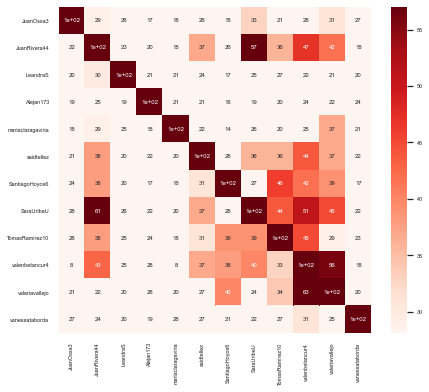

In [23]:
# print(df)
sns.set(font_scale=0.5)
sns.set_palette("coolwarm")
figure = plt.gcf() # get current figure
figure.set_size_inches(7, 6)
mapa = sns.heatmap(df, annot=True, vmin = similarMean, vmax = max(flatSimilar),cmap = "Reds")
plt.savefig(rootpath/'mapaSimilaridad.pdf', dpi=300,bbox_inches='tight')

#### Pendientes mapa de calor

convertir en mapa de calor diagonal, seleccionar el máximo y hacer la gráfica como se indica aquí:
https://seaborn.pydata.org/examples/many_pairwise_correlations.html

### Crear un cuaderno con todos los códigos para comparación y verificación de fraudes

In [24]:
import subprocess

for similar in mostSimilar:
    path1 = str(similar[0])
    path2 = str(similar[1])
    command = f'python pydiff.py -p "{path1}" "{path2}"'
#     print(command)
    try:
        subprocess.call(command, timeout = 1, shell=True)
    except:
        pass
#   os.system(command)
# nb = nbf.v4.new_notebook()
# for (estPath,estName,estScripts) in zip(pathList,nameList,scriptList):
#     celdas = conformarCeldas(nb,estName,estScripts)
    
#     nb['cells'] += celdas
# nbf.write(nb, 'RevisionEntregas.ipynb')

### Refs

https://nbviewer.org/gist/fperez/9716279

https://github.com/yebrahim/pydiff